## Linear Regression


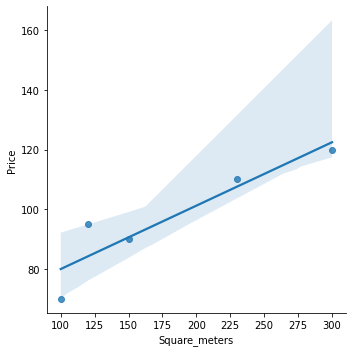

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data = {
    'Squaremeters':[100, 150, 120, 300, 230], 
    'Price':[70, 90, 95, 120, 110]
    })

sns.lmplot(x='Squaremeters', y='Price', data = df)

 ***y = wx + b***


*   y = label (Price)
*   w = Weight of x
*   x = Feature (Squaremeters)
*   b = bias

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.DataFrame(data = {
    'Squaremeters': [100, 150, 120, 300, 230], 
    'Price': [70, 90, 95, 120, 110]
    })

X = df.iloc[:, :-1].values # feature
y = df.iloc[:, -1].values # label

reg = LinearRegression().fit(X, y)

print(f"Score: {reg.score(X, y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.8460528874197938
Coefficient: [0.21223022]
Intercept: 58.79856115107912


In [ ]:
Squaremeters = int(input("Please enter the square meter for which you will estimate the price: "))

print(f"{Squaremeters} square meter house price: {reg.predict(np.array([[Squaremeters]]))}")

Please enter the square meter for which you will estimate the price: 100
100 square meter house price: [80.02158273]


In [ ]:
Squaremeters * reg.coef_[0] + float(reg.intercept_)

80.02158273381295

## Multiple Linear Regression

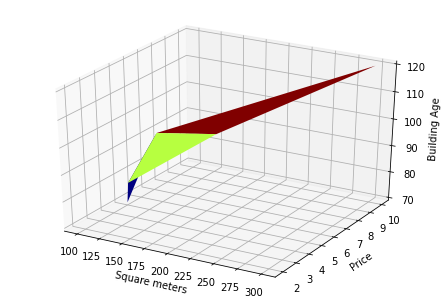

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame(data = {
    'Square meters':[100, 150, 120, 300, 230], 
    'Building Age':[5, 2, 6, 10, 3], 
    'Price':[70, 90, 95, 120, 110]
    })

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df['Square meters'], df['Building Age'], df['Price'], cmap=cm.jet, linewidth=0.2)
ax.set_xlabel('Square meters')
ax.set_ylabel('Price')
ax.set_zlabel('Building Age')
plt.show()

 ***y = w1x1 + w2x2 + c***


*   y = label (Price)
*   w1 = Weight of x1 
*   x1 = Feature 1 (Square meter)
*   w2 = Weight of x2
*   x2 = Feature 2 (Building Age)  
*   c = bias

In [ ]:
df = pd.DataFrame(data = {
    'Square meters':[100, 150, 120, 300, 230], 
    'Building Age':[5, 2, 6, 10, 3], 
    'Price':[70, 90, 95, 120, 110]
    })

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

reg = LinearRegression().fit(X, y)

print(f"Score: {reg.score(X, y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.8465258951131542
Coefficient: [ 0.21520796 -0.15619124]
Intercept: 59.0747612003911


In [ ]:
# y = b0 + b1x1 + b2x2

y = 59.0747612003911 + (0.21520796 * 100) + (-0.15619124 * 5)
print(y) # 79.8146010003911

79.8146010003911


### Non-Linear - Polynomial Regression

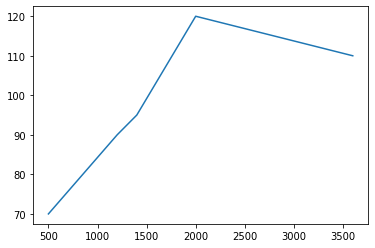

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data = {
    'Square meters':[100, 150, 160, 200, 230], 
    'Height':[50, 60, 70, 80, 90], 
    'Width': [10, 20, 20, 25, 40], 
    'Price':[70, 90, 95, 120, 110]
    })

df['Area'] = df['Height'] * df['Width']
df.drop(columns = ['Height', 'Width'])

plt.plot(df['Area'], df['Price'])

  y = ax ** 3 + b

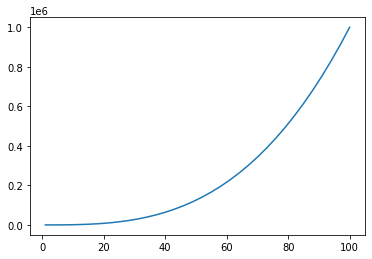

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data = {
    'Square meters': range(1,101, 3)
    })

df['Price'] = df['Square meters'] ** 3

plt.plot(df['Square meters'], df['Price'])

## Error Concept in Our Regression Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(data = {
    'Square meters':[100, 150, 120, 300, 230], 
    'Price':[70, 90, 95, 120, 110]
    })

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

reg = LinearRegression().fit(X, y)

total_error = 0
for idx in range(len(df)):
  real_price = df.loc[idx]['Price']
  square_meters = df.loc[idx]['Square meters']

  estimated_price = reg.predict([[square_meters]])[0]

  # Hatali gosterim abs eklenmeli, olmamasi gerekiyor!
  print(f"{df.loc[idx]['Square meters']} Square meters real price: {real_price}. Estimated price: {estimated_price}. Error: {real_price - estimated_price}")
  total_error = real_price - estimated_price

print(f"\nTotal Error: {total_error}")

100 Square meters real price: 70. Estimated price: 80.02158273381295. Error: -10.021582733812949
150 Square meters real price: 90. Estimated price: 90.63309352517986. Error: -0.6330935251798593
120 Square meters real price: 95. Estimated price: 84.2661870503597. Error: 10.733812949640296
300 Square meters real price: 120. Estimated price: 122.46762589928059. Error: -2.4676258992805913
230 Square meters real price: 110. Estimated price: 107.61151079136691. Error: 2.3884892086330893

Total Error: 2.3884892086330893


In [ ]:
df.head()

,Square meters,Price
0,100,70
1,150,90
2,120,95
3,300,120
4,230,110


### R2 (R squared) 


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.DataFrame(data = {
    'Square meters':[100, 150, 120, 300, 230], 
    'Building Age':[5, 2, 6, 10, 3], 
    'Price':[70, 90, 95, 120, 110]})

In [ ]:
df.head()

,Square meters,Building Age,Price
0,100,5,70
1,150,2,90
2,120,6,95
3,300,10,120
4,230,3,110


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [ ]:
X

array([[100,   5],
       [150,   2],
       [120,   6],
       [300,  10],
       [230,   3]])

In [ ]:
y

array([ 70,  90,  95, 120, 110])

In [ ]:
reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  square_meters = df.loc[idx]["Square meters"]
  building_age = df.loc[idx]["Building Age"]

  y_pred.append(reg.predict([[square_meters,building_age]]))

print(reg.score(X, y)) # X -> Test data, y -> Actual label values of test data 
print(r2_score(y, y_pred)) # y -> Actual label values, y_pred -> y values predicted by model

0.8465258951131542
0.8465258951131542


### Mean Absolute Error (MAE)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.DataFrame(data = {
    'Square meters':[100, 150, 120, 300, 230], 
    'Building Age':[5, 2, 6, 10, 3], 
    'Price':[70, 90, 95, 120, 110]
    })

X = df.iloc[:,:-1].values # feature values (take columns until last column)
y = df.iloc[:,-1].values # label values (take only last column)

reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  square_meters = df.loc[idx]["Square meters"]
  building_age = df.loc[idx]["Building Age"]

  y_pred.append(reg.predict([[square_meters,building_age]]))


print(mean_absolute_error(y, y_pred))

5.173364755434096


### Mean Squared Error (MSE)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(data = {
    'Square meters':[100, 150, 120, 300, 230], 
    'Building Age':[5, 2, 6, 10, 3], 
    'Price':[70, 90, 95, 120, 110]})

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  square_meters = df.loc[idx]["Square meters"]
  building_age = df.loc[idx]["Building Age"]

  y_pred.append(reg.predict([[square_meters,building_age]]))


print(mean_squared_error(y, y_pred))

45.42833504650633


### Train-Test-Validation Split 

In [ ]:
#train-test split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.DataFrame(data = {
    'Square meters':[100, 150, 120, 300, 230], 
    'Building Age':[5, 2, 6, 10, 3], 
    'Price':[70, 90, 95, 120, 110]})

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_train)

(4, 2)
(1, 2)
(4,)
(1,)
[[300  10]
 [120   6]
 [150   2]
 [230   3]]


In [ ]:
X_train

array([[300,  10],
       [120,   6],
       [150,   2],
       [230,   3]])

In [ ]:
X_test

array([[100,   5]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

print(X_train)

[[300  10]
 [120   6]
 [150   2]
 [230   3]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

print(X_train)

[[100   5]
 [150   2]
 [120   6]
 [230   3]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

print(X_train)

[[300  10]
 [120   6]
 [150   2]
 [230   3]]


In [ ]:
#train-test-validation split
df = pd.DataFrame(data = {
    'Square meters':[100, 150, 120, 300, 230], 
    'Building Age':[5, 2, 6, 10, 3], 
    'Price':[70, 90, 95, 120, 110]})

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_validasyon, y_train, y_validasyon = train_test_split(X_train, y_train, test_size=2)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

print(X_validasyon.shape)
print(y_validasyon.shape)

print(X_train)

(2, 2)
(1, 2)
(2,)
(1,)
(2, 2)
(2,)
[[230   3]
 [300  10]]


#### L1 (Lasso) Regularization

In [ ]:
from sklearn.linear_model import Lasso

df = pd.DataFrame(data = {
    'Square meters':[100, 150, 120, 300, 230], 
    'Building Age':[5, 2, 6, 10, 3], 
    'Price':[70, 90, 95, 120, 110]})

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

model = Lasso(alpha=0.1)
model.fit(X, y)

print(model.coef_)
print(model.score(X, y))
print(model.intercept_)

print(model.predict([[300, 9]]))

[ 0.21485124 -0.1384319 ]
0.8465197737595426
59.04662250437324
[122.2561077]


https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization

#### L2 (Ridge) Regularization



In [ ]:
from sklearn.linear_model import Ridge

df = pd.DataFrame(data = {
    'Square meters':[100, 150, 120, 300, 230], 
    'Building Age':[5, 2, 6, 10, 3], 
    'Price':[70, 90, 95, 120, 110]
    })

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

model = Ridge(alpha=0.1)
model.fit(X, y)

print(model.coef_)
print(model.score(X, y))
print(model.intercept_)

model.predict([[300, 9]])

[ 0.21519658 -0.15563458]
0.8465258890938407
59.07391617007209


array([122.23217769])

#### Real Life Scenario with Iris Dataset

#### Gathering the Data

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
feature_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
label_df = pd.DataFrame(data= iris.target, columns= ['species'])

In [ ]:
feature_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
label_df.head()

,species
0,0
1,0
2,0
3,0
4,0


In [ ]:
#concat dataframe to gather full dataset
iris_df = pd.concat([feature_df, label_df], axis= 1)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## A Statistical Analysis of Data

In [ ]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import seaborn as sns

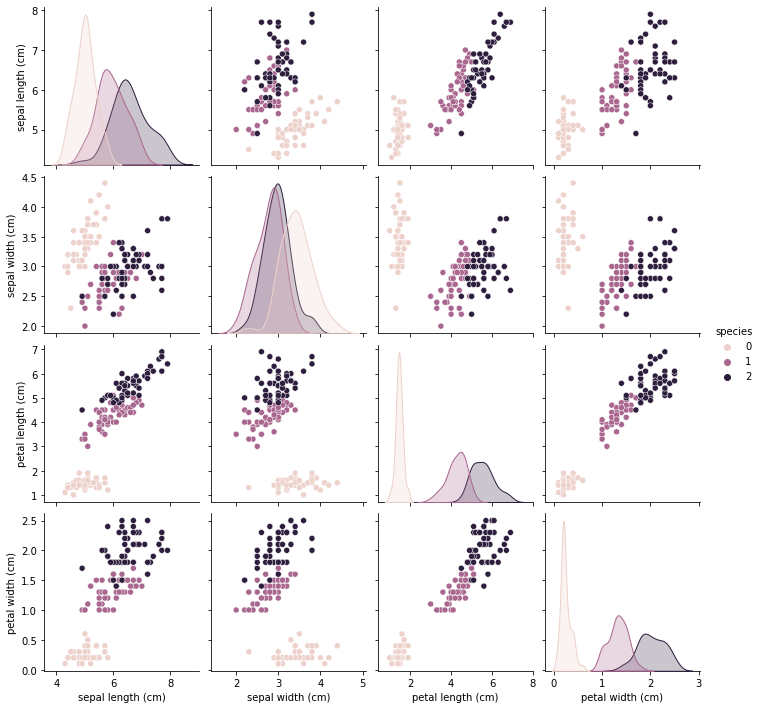

In [ ]:
sns.pairplot(iris_df, hue = "species")

## Training Our Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
X = iris_df.select_dtypes("float64").drop("sepal length (cm)", axis = 1)
y = iris_df["sepal length (cm)"]

In [ ]:
X.head()

,sepal width (cm),petal length (cm),petal width (cm)
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [ ]:
y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [ ]:
linear_model = LinearRegression()
ridge_model = Ridge() #L2
lasso_model = Lasso() #L1

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

print(linear_model.score(X_train, y_train))
print(ridge_model.score(X_train, y_train))
print(lasso_model.score(X_train, y_train))

0.8569234538728812
0.8547648903972094
0.2553897136130333


## Metrics

In [ ]:
lin_pred = linear_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

In [ ]:
pred_dict = {"Linear": lin_pred, "Ridge":ridge_pred, "Lasso": lasso_pred}

In [ ]:
pred_dict

{'Lasso': array([5.88404338, 5.65325899, 6.05328526, 5.86865775, 5.89173619,
        5.63787337, 5.79942244, 5.91481463, 5.86865775, 5.82250088,
        5.91481463, 5.63018055, 5.62248774, 5.63787337, 5.63787337,
        5.88404338, 5.96866432, 5.82250088, 5.86865775, 5.9532787 ,
        5.64556618, 5.899429  , 5.64556618, 5.9532787 , 6.0148212 ,
        5.92250744, 5.96866432, 5.97635713, 5.63018055, 5.64556618]),
 'Linear': array([6.36151855, 5.35957166, 7.15349406, 6.07413311, 6.30242202,
        4.8752844 , 5.52731374, 6.12192111, 5.60970014, 5.68925507,
        6.3905227 , 4.73640867, 4.92498901, 4.87849572, 5.20809268,
        6.42358435, 6.65316797, 5.62397795, 6.14262156, 6.36899386,
        4.95316477, 6.24118461, 4.95102389, 6.43641186, 7.77322145,
        6.13131303, 6.59110216, 6.79418458, 4.60157265, 4.8868172 ]),
 'Ridge': array([6.29958218, 5.32847453, 7.11894781, 6.07614485, 6.2677688 ,
        4.8988129 , 5.56656479, 6.20652444, 5.64814824, 5.69704637,
        6.416898

In [ ]:
for key, value in pred_dict.items():
  print("Model:", key)
  print("R2 Score:", r2_score(y_test, value))
  print('Mean Absolute Error:', mean_absolute_error(y_test, value))
  print('Mean Squared Error:', mean_squared_error(y_test, value))
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, value)))
  print()

Model: Linear
R2 Score: 0.8520477902310166
Mean Absolute Error: 0.23412948957780788
Mean Squared Error: 0.10212647866320361
Root Mean Squared Error: 0.3195723371369988

Model: Ridge
R2 Score: 0.8622254010968531
Mean Absolute Error: 0.22780170325123525
Mean Squared Error: 0.09510121313621227
Root Mean Squared Error: 0.30838484582776154

Model: Lasso
R2 Score: 0.24089063417667766
Mean Absolute Error: 0.5818645544848289
Mean Squared Error: 0.5239878915823122
Root Mean Squared Error: 0.7238700792147111



In [ ]:
X.head()

,sepal width (cm),petal length (cm),petal width (cm)
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


## Custom Prediction

In [ ]:
value_to_predict = [[3.7, 5, 0.9]]

In [ ]:
lin_pred = linear_model.predict(value_to_predict)
ridge_pred = ridge_model.predict(value_to_predict)
lasso_pred = lasso_model.predict(value_to_predict)

In [ ]:
pred_dict = {"Linear": lin_pred, "Ridge":ridge_pred, "Lasso": lasso_pred}

In [ ]:
pred_dict

{'Lasso': array([5.90712182]),
 'Linear': array([7.38811915]),
 'Ridge': array([7.20211741])}